# 다중분류 iris 데이터
- best model
- 조기종료

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

In [4]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [6]:
iris = load_iris()
iris_std = StandardScaler().fit_transform(iris.data)
y_oh = to_categorical(iris.target)
X_train, X_test, y_train, y_test = train_test_split(
    iris_std , y_oh, stratify = y_oh, test_size = 0.2, random_state = seed
)

In [8]:
X_train.shape

(120, 4)

## 모델 정의 및 설정

In [7]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [9]:
model = Sequential([
    Dense(12, input_dim = 4, activation='relu'),
    Dense(7, activation='relu'),
    Dense(3, activation='softmax'),
])
print(model.summary())
model.compile('adam', 'categorical_crossentropy', ['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                60        
                                                                 
 dense_1 (Dense)             (None, 7)                 91        
                                                                 
 dense_2 (Dense)             (None, 3)                 24        
                                                                 
Total params: 175
Trainable params: 175
Non-trainable params: 0
_________________________________________________________________
None


In [10]:
mc = ModelCheckpoint('iris_best.h5', monitor='val_loss', 
                     verbose = 1, save_best_only = True)
es = EarlyStopping(patience=30)

In [12]:
hist = model.fit(X_train, y_train, validation_split = 0.2,
                 epochs = 1000, batch_size = 100, verbose = 0,
                 callbacks = [mc, es])


Epoch 1: val_loss improved from inf to 0.09823, saving model to iris_best.h5

Epoch 2: val_loss improved from 0.09823 to 0.09816, saving model to iris_best.h5

Epoch 3: val_loss improved from 0.09816 to 0.09814, saving model to iris_best.h5

Epoch 4: val_loss improved from 0.09814 to 0.09812, saving model to iris_best.h5

Epoch 5: val_loss improved from 0.09812 to 0.09812, saving model to iris_best.h5

Epoch 6: val_loss improved from 0.09812 to 0.09811, saving model to iris_best.h5

Epoch 7: val_loss improved from 0.09811 to 0.09809, saving model to iris_best.h5

Epoch 8: val_loss improved from 0.09809 to 0.09807, saving model to iris_best.h5

Epoch 9: val_loss improved from 0.09807 to 0.09804, saving model to iris_best.h5

Epoch 10: val_loss improved from 0.09804 to 0.09801, saving model to iris_best.h5

Epoch 11: val_loss improved from 0.09801 to 0.09799, saving model to iris_best.h5

Epoch 12: val_loss improved from 0.09799 to 0.09798, saving model to iris_best.h5

Epoch 13: val_lo

In [13]:
best_model = load_model('iris_best.h5')
best_model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 329ms/step - loss: 0.1605 - accuracy: 0.9333


[0.1605035960674286, 0.9333333373069763]

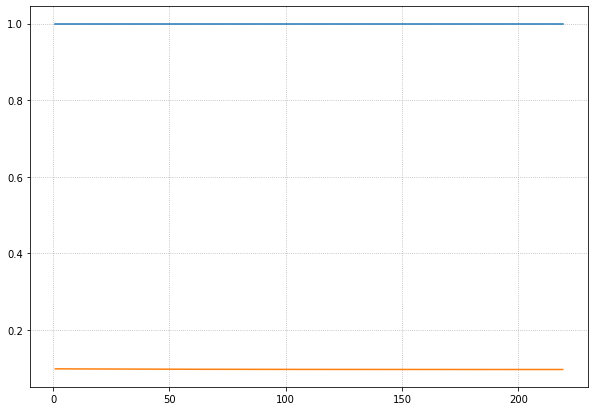

In [15]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc) + 1)

plt.figure(figsize = (10, 7))
plt.plot(xs, y_acc, label = 'accuracy')
plt.plot(xs, y_vloss, label = 'validation_loss')
plt.grid(linestyle = ':')

plt.show()